In [2]:
import datetime
import pyaurorax
import matplotlib.pyplot as plt

aurorax = pyaurorax.PyAuroraX()

In [3]:
at = aurorax.tools

In [4]:
# Get an hour of THEMIS data
dataset_name = "THEMIS_ASI_RAW"
start_dt = datetime.datetime(2021, 11, 4, 9, 0)
end_dt = datetime.datetime(2021, 11, 4, 9, 59)
site_uid = "atha"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)
themis_img = data.data
themis_ts = data.timestamp

# Grab THEMIS skymap
start_dt = datetime.datetime(2020, 1, 1)
end_dt = datetime.datetime(2022, 1, 1)
r = aurorax.data.ucalgary.download("THEMIS_ASI_SKYMAP_IDLSAV", start_dt, end_dt, site_uid="atha", overwrite=True)
r.filenames
themis_skymap = aurorax.data.ucalgary.read(r.dataset, r.filenames[-1]).data[0]

# Get an hour of RGB data
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2021, 11, 4, 3, 0)
end_dt = datetime.datetime(2021, 11, 4, 3, 59)
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid="gill")
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)
rgb_img = data.data
rgb_ts = data.timestamp

# Grab RGB skymap
start_dt = datetime.datetime(2020, 1, 1)
end_dt = datetime.datetime(2022, 1, 1)
r = aurorax.data.ucalgary.download("TREX_RGB_SKYMAP_IDLSAV", start_dt, end_dt, site_uid="gill", overwrite=True)
r.filenames
rgb_skymap = aurorax.data.ucalgary.read(r.dataset, r.filenames[-2]).data[0]

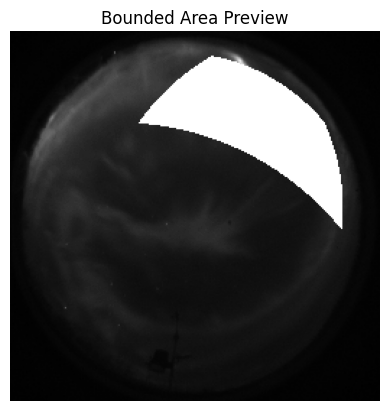

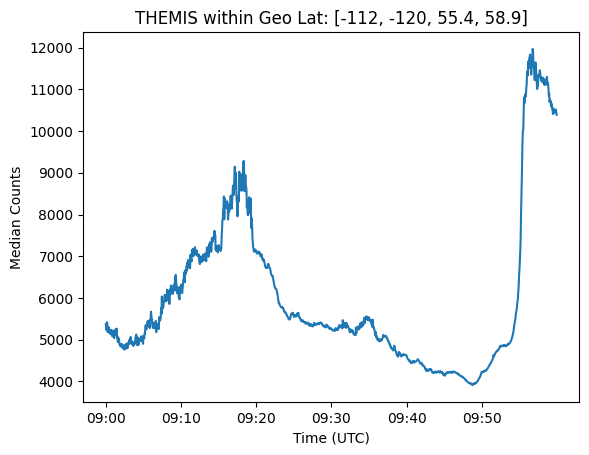

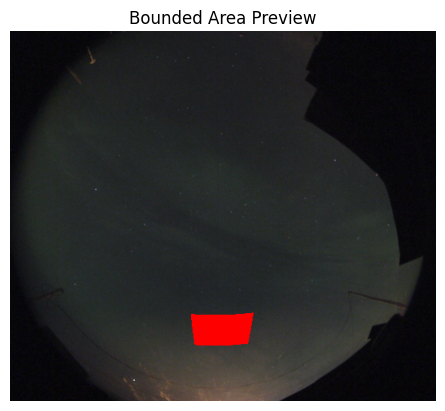

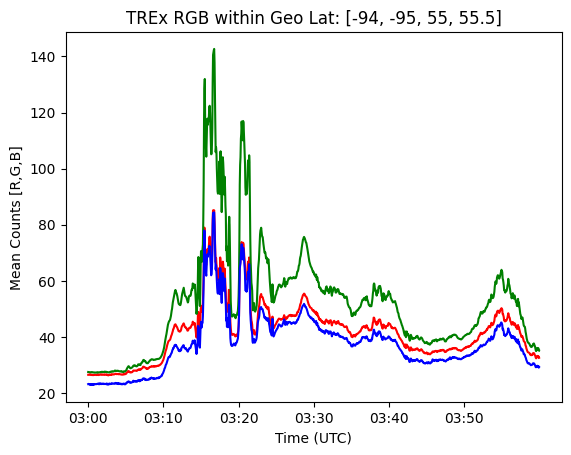

In [5]:
# Geological Lat/Lon bounding box example

lon_lat = [-112, -120, 55.4, 58.9]
altitude_km = 115

themis_median = at.bounding_box.extract_metric.geo(themis_img, themis_skymap, altitude_km, lon_lat, show_preview=True)

plt.figure()
plt.plot(themis_median)
plt.title("THEMIS within Geo Lat: "+str(lon_lat))
plt.xlabel("Time (UTC)")
plt.ylabel("Median Counts")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(themis_ts[i],format="%H:%M") for i in range(0,1199,200)])

lon_lat = [-94, -95, 55, 55.5]
altitude_km = 115
rgb_mean = at.bounding_box.extract_metric.geo(rgb_img, rgb_skymap, altitude_km, lon_lat, metric='mean', show_preview=True)

plt.figure()
plt.plot(rgb_mean[0, :], color='red')
plt.plot(rgb_mean[1, :], color='green')
plt.plot(rgb_mean[2, :], color='blue')
plt.title("TREx RGB within Geo Lat: "+str(lon_lat))
plt.xlabel("Time (UTC)")
plt.ylabel("Mean Counts [R,G,B]")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(rgb_ts[i],format="%H:%M") for i in range(0,1199,200)])
plt.show()

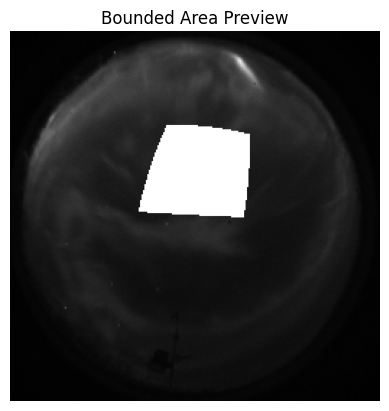

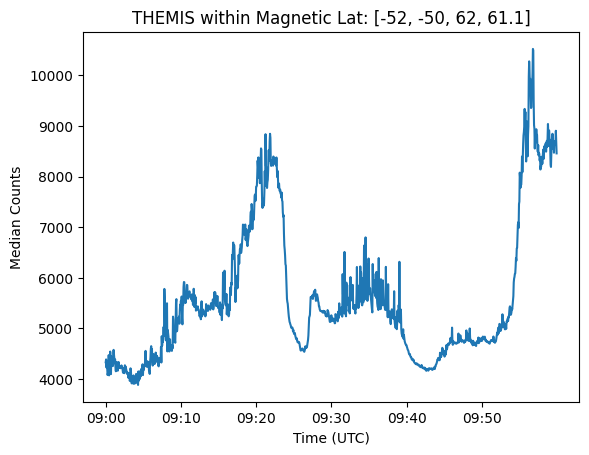

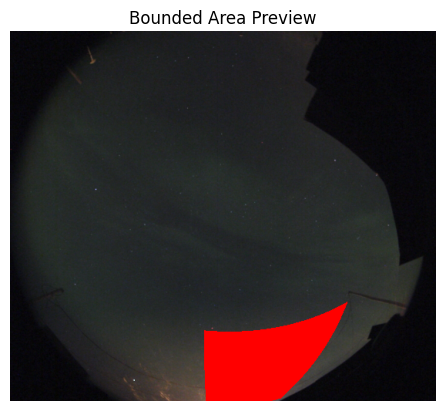

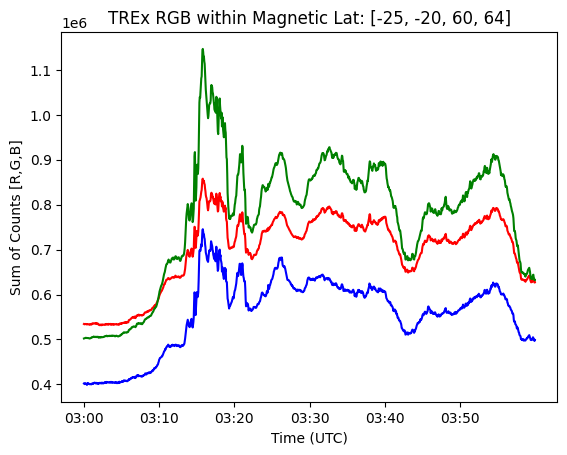

In [6]:
# Geomagnetic Lat/Lon bounding box example

lon_lat = [-52, -50, 62, 61.1]
altitude_km = 110

themis_median = at.bounding_box.extract_metric.mag(themis_img, themis_ts[0], themis_skymap, altitude_km, lon_lat, show_preview=True)

plt.figure()
plt.plot(themis_median)
plt.title("THEMIS within Magnetic Lat: "+str(lon_lat))
plt.xlabel("Time (UTC)")
plt.ylabel("Median Counts")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(themis_ts[i],format="%H:%M") for i in range(0,1199,200)])

lon_lat = [-25, -20, 60, 64]
rgb_mean = at.bounding_box.extract_metric.mag(rgb_img, rgb_ts[0], rgb_skymap, altitude_km, lon_lat, metric='sum', show_preview=True)

plt.figure()
plt.plot(rgb_mean[0, :], color='red')
plt.plot(rgb_mean[1, :], color='green')
plt.plot(rgb_mean[2, :], color='blue')
plt.title("TREx RGB within Magnetic Lat: "+str(lon_lat))
plt.xlabel("Time (UTC)")
plt.ylabel("Sum of Counts [R,G,B]")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(rgb_ts[i],format="%H:%M") for i in range(0,1199,200)])

plt.show()

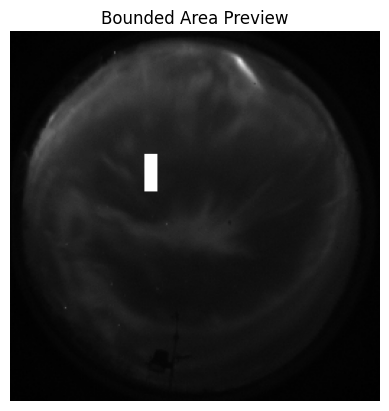

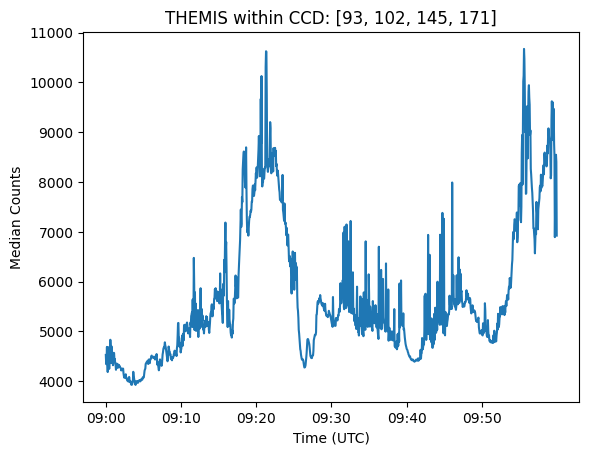

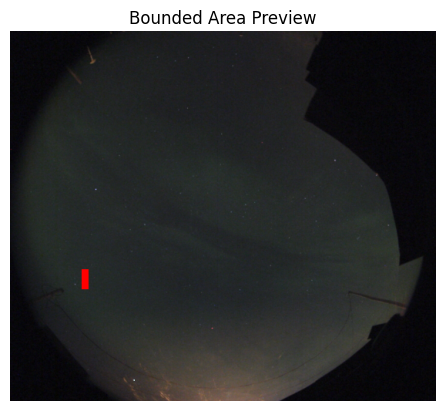

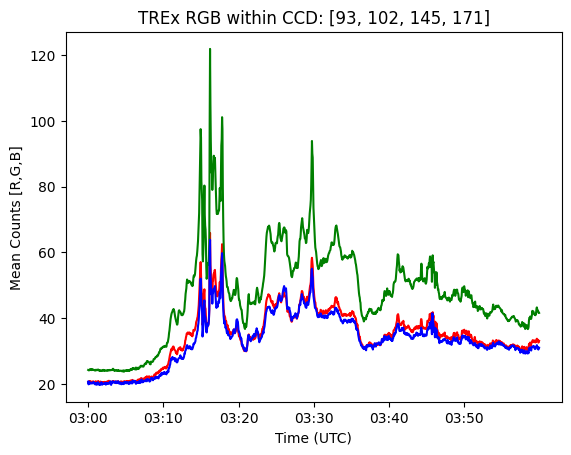

In [7]:
# CCD x/y bounding box example

ccd_bounds = [93, 102, 145, 171]
altitude_km = 110

themis_median = at.bounding_box.extract_metric.ccd(themis_img, ccd_bounds, show_preview=True)

plt.figure()
plt.plot(themis_median)
plt.title("THEMIS within CCD: "+str(ccd_bounds))
plt.xlabel("Time (UTC)")
plt.ylabel("Median Counts")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(themis_ts[i],format="%H:%M") for i in range(0,1199,200)])

rgb_mean = at.bounding_box.extract_metric.ccd(rgb_img, ccd_bounds, metric='mean', show_preview=True)

plt.figure()
plt.plot(rgb_mean[0, :], color='red')
plt.plot(rgb_mean[1, :], color='green')
plt.plot(rgb_mean[2, :], color='blue')
plt.title("TREx RGB within CCD: "+str(ccd_bounds))
plt.xlabel("Time (UTC)")
plt.ylabel("Mean Counts [R,G,B]")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(rgb_ts[i],format="%H:%M") for i in range(0,1199,200)])

plt.show()

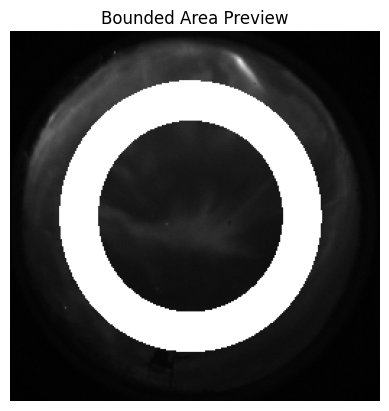

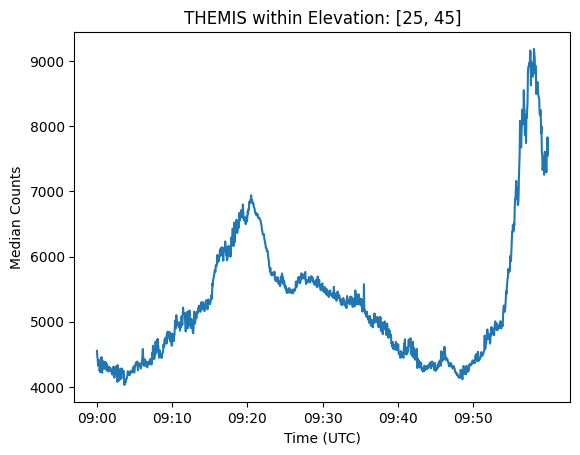

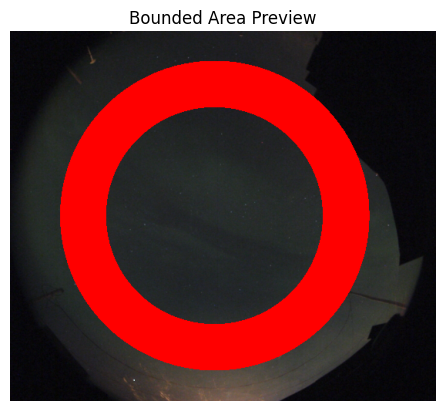

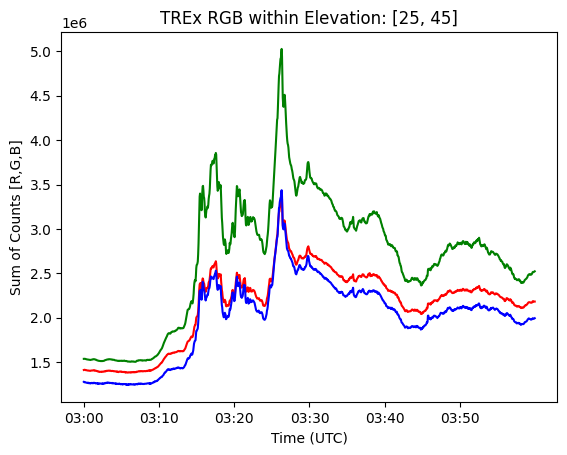

In [8]:
# Elevation range example

el_range = [25, 45]

themis_median = at.bounding_box.extract_metric.elevation(themis_img, themis_skymap, el_range, show_preview=True)

plt.figure()
plt.plot(themis_median)
plt.title("THEMIS within Elevation: "+str(el_range))
plt.xlabel("Time (UTC)")
plt.ylabel("Median Counts")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(themis_ts[i],format="%H:%M") for i in range(0,1199,200)])

rgb_sum = at.bounding_box.extract_metric.elevation(rgb_img, rgb_skymap, el_range, metric='sum', show_preview=True)

plt.figure()
plt.plot(rgb_sum[0, :], color='red')
plt.plot(rgb_sum[1, :], color='green')
plt.plot(rgb_sum[2, :], color='blue')
plt.title("TREx RGB within Elevation: "+str(el_range))
plt.xlabel("Time (UTC)")
plt.ylabel("Sum of Counts [R,G,B]")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(rgb_ts[i],format="%H:%M") for i in range(0,1199,200)])
plt.show()

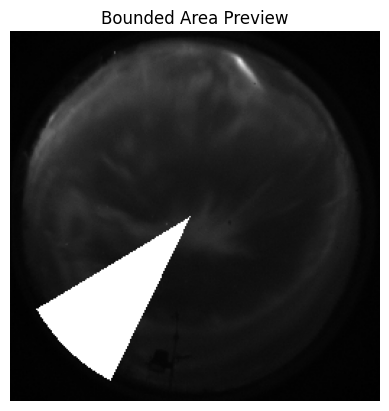

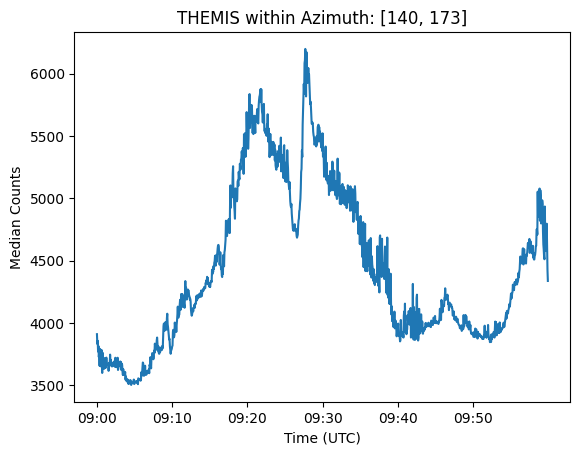

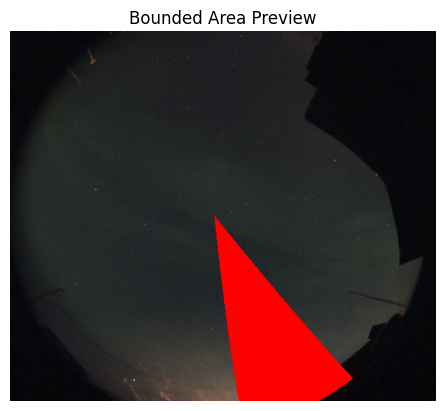

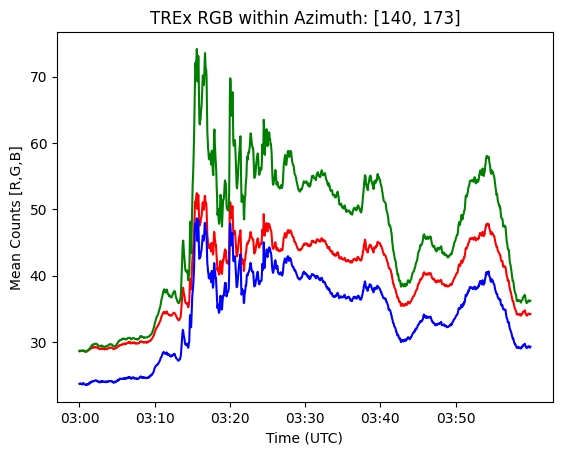

In [9]:
# Azimuth range example

az_range = [140, 173]

themis_median = at.bounding_box.extract_metric.azimuth(themis_img, themis_skymap, az_range, show_preview=True)

plt.figure()
plt.plot(themis_median)
plt.title("THEMIS within Azimuth: "+str(az_range))
plt.xlabel("Time (UTC)")
plt.ylabel("Median Counts")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(themis_ts[i],format="%H:%M") for i in range(0,1199,200)])

rgb_sum = at.bounding_box.extract_metric.azimuth(rgb_img, rgb_skymap, az_range, metric='mean', show_preview=True)

plt.figure()
plt.plot(rgb_sum[0, :], color='red')
plt.plot(rgb_sum[1, :], color='green')
plt.plot(rgb_sum[2, :], color='blue')
plt.title("TREx RGB within Azimuth: "+str(az_range))
plt.xlabel("Time (UTC)")
plt.ylabel("Mean Counts [R,G,B]")
plt.xticks(ticks=[i for i in range(0,1199,200)], labels=[datetime.datetime.strftime(rgb_ts[i],format="%H:%M") for i in range(0,1199,200)])
plt.show()